# MAL Determin shapes


## TODO
* Make a picture in paint and do som preprossing on it.
* Look at under and overfitting.
* Finetune with a grid search.
* Plot maybe a histogram?

## Problem description
TODO: hvilket problem førsøger i at løse med ML?


Our project is about detecting and clasifying four different shapes. The shapes we want to detect is Squares, Triangels, Circles and Stars. 



## The project:

### Loading the Shape dataset
In this step we load the data and 

In [39]:
import numpy as np
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [40]:
#TODO load the dataset:
import sys,os
from time import time
sys.path.append(os.path.expanduser('ProjectFunctions'))
from ProjectFunctions import LoadShapes as LS


start = time()

X, y = LS.getShapes()

t = time()-start
print(f"OK, Load time={t:0.1f}")

OK, Load time=29.6


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Star


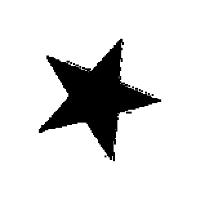

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Circle


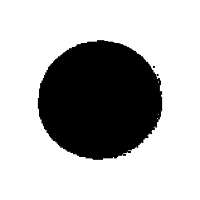

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Square


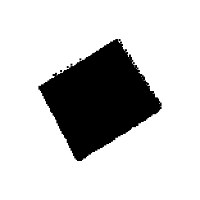

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Triangle


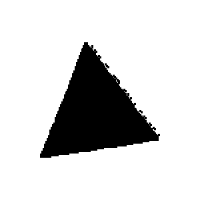

In [3]:
# Printing and controling data sample expected to be a star.
print(X[8])
print(y[8])
imStar = Image.fromarray(X[8])
display(imStar)

# Printing and controling data sample expected to be a circle.
print(X[8+3765])
print(y[8+3765])
imCircle = Image.fromarray(X[8+3765])
display(imCircle)

# Printing and controling data sample expected to be a square.
print(X[8+3765*2])
print(y[8+3765*2])
imSquare = Image.fromarray(X[8+3765*2])
display(imSquare)

# Printing and controling data sample expected to be a triangle.
print(X[8+3765*3])
print(y[8+3765*3])
imTriangle = Image.fromarray(X[8+3765*3])
display(imTriangle)

### Preprossing
TODO: descripe what we think has been done to our data in the preprossing prosses.

We are using CNN (convolutional Neural Network)

Inspiration has been found at the article [Building a Convolutional Neural Network (CNN) in Keras](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5).

In [4]:
X = np.array(X)
X_shape = X.shape
print("The shape of X: ", X_shape)

The shape of X:  (14970, 200, 200)


#### Reshaping the data to fit the CNN model
We reshape the model to have the last dimention 1 which means that the images are in greyscale.

In [5]:
X_r = X.reshape(14970, 200, 200,1)

X_rShape = X_r.shape
print("The new shape of the reshaped X: ", X_rShape)

input_X_rShape = X_rShape[1:]
print("The shape of X ready to be inputed in the CNN: ", input_X_rShape)

The new shape of the reshaped X:  (14970, 200, 200, 1)
The shape of X ready to be inputed in the CNN:  (200, 200, 1)


#### One-Hot-Encoding of the taget collum
One-hot encoding is a ML meathod that is used to transform categorical data into numerical og binary data.

Inspiration found in the article [How to One Hot Encode Sequence Data in Python](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/). 

In [6]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
y_values = array(y)
#print(y_values)
print("Data: ",y_values, "\n")

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_values)
#print(integer_encoded)
print("integer_encoded: ", integer_encoded)


# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_categorical = onehot_encoder.fit_transform(integer_encoded)
#print(y_categorical)


print("\ny_categorical:\n", y_categorical)
print("\nShape of y_categorical: ", y_categorical.shape)
print("\nExample Star: ", y_categorical[8], "\nExample Circle: ", y_categorical[8+3770], "\nExample Square: ",  y_categorical[8+3770*2], "\nExample Triangle: ", y_categorical[8+3770*3])

# Testing Decoding
print("\nTesting decoding:")
for i in range(y_categorical.shape[0]):
    inverted = label_encoder.inverse_transform([argmax(y_categorical[i,:])])
    print("Decoded[",i, "]: ", inverted, "\n")
    


Data:  ['Star' 'Star' 'Star' ... 'Triangle' 'Triangle' 'Triangle'] 

integer_encoded:  [2 2 2 ... 3 3 3]

y_categorical:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

Shape of y_categorical:  (14970, 4)

Example Star:  [0. 0. 1. 0.] 
Example Circle:  [1. 0. 0. 0.] 
Example Square:  [0. 1. 0. 0.] 
Example Triangle:  [0. 0. 0. 1.]

Testing decoding:
Decoded[ 0 ]:  ['Star'] 

Decoded[ 1 ]:  ['Star'] 

Decoded[ 2 ]:  ['Star'] 

Decoded[ 3 ]:  ['Star'] 

Decoded[ 4 ]:  ['Star'] 

Decoded[ 5 ]:  ['Star'] 

Decoded[ 6 ]:  ['Star'] 

Decoded[ 7 ]:  ['Star'] 

Decoded[ 8 ]:  ['Star'] 

Decoded[ 9 ]:  ['Star'] 

Decoded[ 10 ]:  ['Star'] 

Decoded[ 11 ]:  ['Star'] 

Decoded[ 12 ]:  ['Star'] 

Decoded[ 13 ]:  ['Star'] 

Decoded[ 14 ]:  ['Star'] 

Decoded[ 15 ]:  ['Star'] 

Decoded[ 16 ]:  ['Star'] 

Decoded[ 17 ]:  ['Star'] 

Decoded[ 18 ]:  ['Star'] 

Decoded[ 19 ]:  ['Star'] 

Decoded[ 20 ]:  ['Star'] 

Decoded[ 21 ]:  ['Star'] 

Decoded[ 22 ]:

C:\Users\majas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


 199 ]:  ['Star'] 

Decoded[ 200 ]:  ['Star'] 

Decoded[ 201 ]:  ['Star'] 

Decoded[ 202 ]:  ['Star'] 

Decoded[ 203 ]:  ['Star'] 

Decoded[ 204 ]:  ['Star'] 

Decoded[ 205 ]:  ['Star'] 

Decoded[ 206 ]:  ['Star'] 

Decoded[ 207 ]:  ['Star'] 

Decoded[ 208 ]:  ['Star'] 

Decoded[ 209 ]:  ['Star'] 

Decoded[ 210 ]:  ['Star'] 

Decoded[ 211 ]:  ['Star'] 

Decoded[ 212 ]:  ['Star'] 

Decoded[ 213 ]:  ['Star'] 

Decoded[ 214 ]:  ['Star'] 

Decoded[ 215 ]:  ['Star'] 

Decoded[ 216 ]:  ['Star'] 

Decoded[ 217 ]:  ['Star'] 

Decoded[ 218 ]:  ['Star'] 

Decoded[ 219 ]:  ['Star'] 

Decoded[ 220 ]:  ['Star'] 

Decoded[ 221 ]:  ['Star'] 

Decoded[ 222 ]:  ['Star'] 

Decoded[ 223 ]:  ['Star'] 

Decoded[ 224 ]:  ['Star'] 

Decoded[ 225 ]:  ['Star'] 

Decoded[ 226 ]:  ['Star'] 

Decoded[ 227 ]:  ['Star'] 

Decoded[ 228 ]:  ['Star'] 

Decoded[ 229 ]:  ['Star'] 

Decoded[ 230 ]:  ['Star'] 

Decoded[ 231 ]:  ['Star'] 

Decoded[ 232 ]:  ['Star'] 

Decoded[ 233 ]:  ['Star'] 

Decoded[ 234 ]:  ['Star'] 



Decoded[ 649 ]:  ['Star'] 

Decoded[ 650 ]:  ['Star'] 

Decoded[ 651 ]:  ['Star'] 

Decoded[ 652 ]:  ['Star'] 

Decoded[ 653 ]:  ['Star'] 

Decoded[ 654 ]:  ['Star'] 

Decoded[ 655 ]:  ['Star'] 

Decoded[ 656 ]:  ['Star'] 

Decoded[ 657 ]:  ['Star'] 

Decoded[ 658 ]:  ['Star'] 

Decoded[ 659 ]:  ['Star'] 

Decoded[ 660 ]:  ['Star'] 

Decoded[ 661 ]:  ['Star'] 

Decoded[ 662 ]:  ['Star'] 

Decoded[ 663 ]:  ['Star'] 

Decoded[ 664 ]:  ['Star'] 

Decoded[ 665 ]:  ['Star'] 

Decoded[ 666 ]:  ['Star'] 

Decoded[ 667 ]:  ['Star'] 

Decoded[ 668 ]:  ['Star'] 

Decoded[ 669 ]:  ['Star'] 

Decoded[ 670 ]:  ['Star'] 

Decoded[ 671 ]:  ['Star'] 

Decoded[ 672 ]:  ['Star'] 

Decoded[ 673 ]:  ['Star'] 

Decoded[ 674 ]:  ['Star'] 

Decoded[ 675 ]:  ['Star'] 

Decoded[ 676 ]:  ['Star'] 

Decoded[ 677 ]:  ['Star'] 

Decoded[ 678 ]:  ['Star'] 

Decoded[ 679 ]:  ['Star'] 

Decoded[ 680 ]:  ['Star'] 

Decoded[ 681 ]:  ['Star'] 

Decoded[ 682 ]:  ['Star'] 

Decoded[ 683 ]:  ['Star'] 

Decoded[ 684 ]:  ['S

Decoded[ 1158 ]:  ['Star'] 

Decoded[ 1159 ]:  ['Star'] 

Decoded[ 1160 ]:  ['Star'] 

Decoded[ 1161 ]:  ['Star'] 

Decoded[ 1162 ]:  ['Star'] 

Decoded[ 1163 ]:  ['Star'] 

Decoded[ 1164 ]:  ['Star'] 

Decoded[ 1165 ]:  ['Star'] 

Decoded[ 1166 ]:  ['Star'] 

Decoded[ 1167 ]:  ['Star'] 

Decoded[ 1168 ]:  ['Star'] 

Decoded[ 1169 ]:  ['Star'] 

Decoded[ 1170 ]:  ['Star'] 

Decoded[ 1171 ]:  ['Star'] 

Decoded[ 1172 ]:  ['Star'] 

Decoded[ 1173 ]:  ['Star'] 

Decoded[ 1174 ]:  ['Star'] 

Decoded[ 1175 ]:  ['Star'] 

Decoded[ 1176 ]:  ['Star'] 

Decoded[ 1177 ]:  ['Star'] 

Decoded[ 1178 ]:  ['Star'] 

Decoded[ 1179 ]:  ['Star'] 

Decoded[ 1180 ]:  ['Star'] 

Decoded[ 1181 ]:  ['Star'] 

Decoded[ 1182 ]:  ['Star'] 

Decoded[ 1183 ]:  ['Star'] 

Decoded[ 1184 ]:  ['Star'] 

Decoded[ 1185 ]:  ['Star'] 

Decoded[ 1186 ]:  ['Star'] 

Decoded[ 1187 ]:  ['Star'] 

Decoded[ 1188 ]:  ['Star'] 

Decoded[ 1189 ]:  ['Star'] 

Decoded[ 1190 ]:  ['Star'] 

Decoded[ 1191 ]:  ['Star'] 

Decoded[ 1192 

Decoded[ 1585 ]:  ['Star'] 

Decoded[ 1586 ]:  ['Star'] 

Decoded[ 1587 ]:  ['Star'] 

Decoded[ 1588 ]:  ['Star'] 

Decoded[ 1589 ]:  ['Star'] 

Decoded[ 1590 ]:  ['Star'] 

Decoded[ 1591 ]:  ['Star'] 

Decoded[ 1592 ]:  ['Star'] 

Decoded[ 1593 ]:  ['Star'] 

Decoded[ 1594 ]:  ['Star'] 

Decoded[ 1595 ]:  ['Star'] 

Decoded[ 1596 ]:  ['Star'] 

Decoded[ 1597 ]:  ['Star'] 

Decoded[ 1598 ]:  ['Star'] 

Decoded[ 1599 ]:  ['Star'] 

Decoded[ 1600 ]:  ['Star'] 

Decoded[ 1601 ]:  ['Star'] 

Decoded[ 1602 ]:  ['Star'] 

Decoded[ 1603 ]:  ['Star'] 

Decoded[ 1604 ]:  ['Star'] 

Decoded[ 1605 ]:  ['Star'] 

Decoded[ 1606 ]:  ['Star'] 

Decoded[ 1607 ]:  ['Star'] 

Decoded[ 1608 ]:  ['Star'] 

Decoded[ 1609 ]:  ['Star'] 

Decoded[ 1610 ]:  ['Star'] 

Decoded[ 1611 ]:  ['Star'] 

Decoded[ 1612 ]:  ['Star'] 

Decoded[ 1613 ]:  ['Star'] 

Decoded[ 1614 ]:  ['Star'] 

Decoded[ 1615 ]:  ['Star'] 

Decoded[ 1616 ]:  ['Star'] 

Decoded[ 1617 ]:  ['Star'] 

Decoded[ 1618 ]:  ['Star'] 

Decoded[ 1619 

Decoded[ 1991 ]:  ['Star'] 

Decoded[ 1992 ]:  ['Star'] 

Decoded[ 1993 ]:  ['Star'] 

Decoded[ 1994 ]:  ['Star'] 

Decoded[ 1995 ]:  ['Star'] 

Decoded[ 1996 ]:  ['Star'] 

Decoded[ 1997 ]:  ['Star'] 

Decoded[ 1998 ]:  ['Star'] 

Decoded[ 1999 ]:  ['Star'] 

Decoded[ 2000 ]:  ['Star'] 

Decoded[ 2001 ]:  ['Star'] 

Decoded[ 2002 ]:  ['Star'] 

Decoded[ 2003 ]:  ['Star'] 

Decoded[ 2004 ]:  ['Star'] 

Decoded[ 2005 ]:  ['Star'] 

Decoded[ 2006 ]:  ['Star'] 

Decoded[ 2007 ]:  ['Star'] 

Decoded[ 2008 ]:  ['Star'] 

Decoded[ 2009 ]:  ['Star'] 

Decoded[ 2010 ]:  ['Star'] 

Decoded[ 2011 ]:  ['Star'] 

Decoded[ 2012 ]:  ['Star'] 

Decoded[ 2013 ]:  ['Star'] 

Decoded[ 2014 ]:  ['Star'] 

Decoded[ 2015 ]:  ['Star'] 

Decoded[ 2016 ]:  ['Star'] 

Decoded[ 2017 ]:  ['Star'] 

Decoded[ 2018 ]:  ['Star'] 

Decoded[ 2019 ]:  ['Star'] 

Decoded[ 2020 ]:  ['Star'] 

Decoded[ 2021 ]:  ['Star'] 

Decoded[ 2022 ]:  ['Star'] 

Decoded[ 2023 ]:  ['Star'] 

Decoded[ 2024 ]:  ['Star'] 

Decoded[ 2025 

Decoded[ 2487 ]:  ['Star'] 

Decoded[ 2488 ]:  ['Star'] 

Decoded[ 2489 ]:  ['Star'] 

Decoded[ 2490 ]:  ['Star'] 

Decoded[ 2491 ]:  ['Star'] 

Decoded[ 2492 ]:  ['Star'] 

Decoded[ 2493 ]:  ['Star'] 

Decoded[ 2494 ]:  ['Star'] 

Decoded[ 2495 ]:  ['Star'] 

Decoded[ 2496 ]:  ['Star'] 

Decoded[ 2497 ]:  ['Star'] 

Decoded[ 2498 ]:  ['Star'] 

Decoded[ 2499 ]:  ['Star'] 

Decoded[ 2500 ]:  ['Star'] 

Decoded[ 2501 ]:  ['Star'] 

Decoded[ 2502 ]:  ['Star'] 

Decoded[ 2503 ]:  ['Star'] 

Decoded[ 2504 ]:  ['Star'] 

Decoded[ 2505 ]:  ['Star'] 

Decoded[ 2506 ]:  ['Star'] 

Decoded[ 2507 ]:  ['Star'] 

Decoded[ 2508 ]:  ['Star'] 

Decoded[ 2509 ]:  ['Star'] 

Decoded[ 2510 ]:  ['Star'] 

Decoded[ 2511 ]:  ['Star'] 

Decoded[ 2512 ]:  ['Star'] 

Decoded[ 2513 ]:  ['Star'] 

Decoded[ 2514 ]:  ['Star'] 

Decoded[ 2515 ]:  ['Star'] 

Decoded[ 2516 ]:  ['Star'] 

Decoded[ 2517 ]:  ['Star'] 

Decoded[ 2518 ]:  ['Star'] 

Decoded[ 2519 ]:  ['Star'] 

Decoded[ 2520 ]:  ['Star'] 

Decoded[ 2521 

Decoded[ 2939 ]:  ['Star'] 

Decoded[ 2940 ]:  ['Star'] 

Decoded[ 2941 ]:  ['Star'] 

Decoded[ 2942 ]:  ['Star'] 

Decoded[ 2943 ]:  ['Star'] 

Decoded[ 2944 ]:  ['Star'] 

Decoded[ 2945 ]:  ['Star'] 

Decoded[ 2946 ]:  ['Star'] 

Decoded[ 2947 ]:  ['Star'] 

Decoded[ 2948 ]:  ['Star'] 

Decoded[ 2949 ]:  ['Star'] 

Decoded[ 2950 ]:  ['Star'] 

Decoded[ 2951 ]:  ['Star'] 

Decoded[ 2952 ]:  ['Star'] 

Decoded[ 2953 ]:  ['Star'] 

Decoded[ 2954 ]:  ['Star'] 

Decoded[ 2955 ]:  ['Star'] 

Decoded[ 2956 ]:  ['Star'] 

Decoded[ 2957 ]:  ['Star'] 

Decoded[ 2958 ]:  ['Star'] 

Decoded[ 2959 ]:  ['Star'] 

Decoded[ 2960 ]:  ['Star'] 

Decoded[ 2961 ]:  ['Star'] 

Decoded[ 2962 ]:  ['Star'] 

Decoded[ 2963 ]:  ['Star'] 

Decoded[ 2964 ]:  ['Star'] 

Decoded[ 2965 ]:  ['Star'] 

Decoded[ 2966 ]:  ['Star'] 

Decoded[ 2967 ]:  ['Star'] 

Decoded[ 2968 ]:  ['Star'] 

Decoded[ 2969 ]:  ['Star'] 

Decoded[ 2970 ]:  ['Star'] 

Decoded[ 2971 ]:  ['Star'] 

Decoded[ 2972 ]:  ['Star'] 

Decoded[ 2973 

Decoded[ 3444 ]:  ['Star'] 

Decoded[ 3445 ]:  ['Star'] 

Decoded[ 3446 ]:  ['Star'] 

Decoded[ 3447 ]:  ['Star'] 

Decoded[ 3448 ]:  ['Star'] 

Decoded[ 3449 ]:  ['Star'] 

Decoded[ 3450 ]:  ['Star'] 

Decoded[ 3451 ]:  ['Star'] 

Decoded[ 3452 ]:  ['Star'] 

Decoded[ 3453 ]:  ['Star'] 

Decoded[ 3454 ]:  ['Star'] 

Decoded[ 3455 ]:  ['Star'] 

Decoded[ 3456 ]:  ['Star'] 

Decoded[ 3457 ]:  ['Star'] 

Decoded[ 3458 ]:  ['Star'] 

Decoded[ 3459 ]:  ['Star'] 

Decoded[ 3460 ]:  ['Star'] 

Decoded[ 3461 ]:  ['Star'] 

Decoded[ 3462 ]:  ['Star'] 

Decoded[ 3463 ]:  ['Star'] 

Decoded[ 3464 ]:  ['Star'] 

Decoded[ 3465 ]:  ['Star'] 

Decoded[ 3466 ]:  ['Star'] 

Decoded[ 3467 ]:  ['Star'] 

Decoded[ 3468 ]:  ['Star'] 

Decoded[ 3469 ]:  ['Star'] 

Decoded[ 3470 ]:  ['Star'] 

Decoded[ 3471 ]:  ['Star'] 

Decoded[ 3472 ]:  ['Star'] 

Decoded[ 3473 ]:  ['Star'] 

Decoded[ 3474 ]:  ['Star'] 

Decoded[ 3475 ]:  ['Star'] 

Decoded[ 3476 ]:  ['Star'] 

Decoded[ 3477 ]:  ['Star'] 

Decoded[ 3478 

Decoded[ 3924 ]:  ['Circle'] 

Decoded[ 3925 ]:  ['Circle'] 

Decoded[ 3926 ]:  ['Circle'] 

Decoded[ 3927 ]:  ['Circle'] 

Decoded[ 3928 ]:  ['Circle'] 

Decoded[ 3929 ]:  ['Circle'] 

Decoded[ 3930 ]:  ['Circle'] 

Decoded[ 3931 ]:  ['Circle'] 

Decoded[ 3932 ]:  ['Circle'] 

Decoded[ 3933 ]:  ['Circle'] 

Decoded[ 3934 ]:  ['Circle'] 

Decoded[ 3935 ]:  ['Circle'] 

Decoded[ 3936 ]:  ['Circle'] 

Decoded[ 3937 ]:  ['Circle'] 

Decoded[ 3938 ]:  ['Circle'] 

Decoded[ 3939 ]:  ['Circle'] 

Decoded[ 3940 ]:  ['Circle'] 

Decoded[ 3941 ]:  ['Circle'] 

Decoded[ 3942 ]:  ['Circle'] 

Decoded[ 3943 ]:  ['Circle'] 

Decoded[ 3944 ]:  ['Circle'] 

Decoded[ 3945 ]:  ['Circle'] 

Decoded[ 3946 ]:  ['Circle'] 

Decoded[ 3947 ]:  ['Circle'] 

Decoded[ 3948 ]:  ['Circle'] 

Decoded[ 3949 ]:  ['Circle'] 

Decoded[ 3950 ]:  ['Circle'] 

Decoded[ 3951 ]:  ['Circle'] 

Decoded[ 3952 ]:  ['Circle'] 

Decoded[ 3953 ]:  ['Circle'] 

Decoded[ 3954 ]:  ['Circle'] 

Decoded[ 3955 ]:  ['Circle'] 

Decoded[


Decoded[ 4317 ]:  ['Circle'] 

Decoded[ 4318 ]:  ['Circle'] 

Decoded[ 4319 ]:  ['Circle'] 

Decoded[ 4320 ]:  ['Circle'] 

Decoded[ 4321 ]:  ['Circle'] 

Decoded[ 4322 ]:  ['Circle'] 

Decoded[ 4323 ]:  ['Circle'] 

Decoded[ 4324 ]:  ['Circle'] 

Decoded[ 4325 ]:  ['Circle'] 

Decoded[ 4326 ]:  ['Circle'] 

Decoded[ 4327 ]:  ['Circle'] 

Decoded[ 4328 ]:  ['Circle'] 

Decoded[ 4329 ]:  ['Circle'] 

Decoded[ 4330 ]:  ['Circle'] 

Decoded[ 4331 ]:  ['Circle'] 

Decoded[ 4332 ]:  ['Circle'] 

Decoded[ 4333 ]:  ['Circle'] 

Decoded[ 4334 ]:  ['Circle'] 

Decoded[ 4335 ]:  ['Circle'] 

Decoded[ 4336 ]:  ['Circle'] 

Decoded[ 4337 ]:  ['Circle'] 

Decoded[ 4338 ]:  ['Circle'] 

Decoded[ 4339 ]:  ['Circle'] 

Decoded[ 4340 ]:  ['Circle'] 

Decoded[ 4341 ]:  ['Circle'] 

Decoded[ 4342 ]:  ['Circle'] 

Decoded[ 4343 ]:  ['Circle'] 

Decoded[ 4344 ]:  ['Circle'] 

Decoded[ 4345 ]:  ['Circle'] 

Decoded[ 4346 ]:  ['Circle'] 

Decoded[ 4347 ]:  ['Circle'] 

Decoded[ 4348 ]:  ['Circle'] 

Decoded

Decoded[ 4655 ]:  ['Circle'] 

Decoded[ 4656 ]:  ['Circle'] 

Decoded[ 4657 ]:  ['Circle'] 

Decoded[ 4658 ]:  ['Circle'] 

Decoded[ 4659 ]:  ['Circle'] 

Decoded[ 4660 ]:  ['Circle'] 

Decoded[ 4661 ]:  ['Circle'] 

Decoded[ 4662 ]:  ['Circle'] 

Decoded[ 4663 ]:  ['Circle'] 

Decoded[ 4664 ]:  ['Circle'] 

Decoded[ 4665 ]:  ['Circle'] 

Decoded[ 4666 ]:  ['Circle'] 

Decoded[ 4667 ]:  ['Circle'] 

Decoded[ 4668 ]:  ['Circle'] 

Decoded[ 4669 ]:  ['Circle'] 

Decoded[ 4670 ]:  ['Circle'] 

Decoded[ 4671 ]:  ['Circle'] 

Decoded[ 4672 ]:  ['Circle'] 

Decoded[ 4673 ]:  ['Circle'] 

Decoded[ 4674 ]:  ['Circle'] 

Decoded[ 4675 ]:  ['Circle'] 

Decoded[ 4676 ]:  ['Circle'] 

Decoded[ 4677 ]:  ['Circle'] 

Decoded[ 4678 ]:  ['Circle'] 

Decoded[ 4679 ]:  ['Circle'] 

Decoded[ 4680 ]:  ['Circle'] 

Decoded[ 4681 ]:  ['Circle'] 

Decoded[ 4682 ]:  ['Circle'] 

Decoded[ 4683 ]:  ['Circle'] 

Decoded[ 4684 ]:  ['Circle'] 

Decoded[ 4685 ]:  ['Circle'] 

Decoded[ 4686 ]:  ['Circle'] 

Decoded[

Decoded[ 5080 ]:  ['Circle'] 

Decoded[ 5081 ]:  ['Circle'] 

Decoded[ 5082 ]:  ['Circle'] 

Decoded[ 5083 ]:  ['Circle'] 

Decoded[ 5084 ]:  ['Circle'] 

Decoded[ 5085 ]:  ['Circle'] 

Decoded[ 5086 ]:  ['Circle'] 

Decoded[ 5087 ]:  ['Circle'] 

Decoded[ 5088 ]:  ['Circle'] 

Decoded[ 5089 ]:  ['Circle'] 

Decoded[ 5090 ]:  ['Circle'] 

Decoded[ 5091 ]:  ['Circle'] 

Decoded[ 5092 ]:  ['Circle'] 

Decoded[ 5093 ]:  ['Circle'] 

Decoded[ 5094 ]:  ['Circle'] 

Decoded[ 5095 ]:  ['Circle'] 

Decoded[ 5096 ]:  ['Circle'] 

Decoded[ 5097 ]:  ['Circle'] 

Decoded[ 5098 ]:  ['Circle'] 

Decoded[ 5099 ]:  ['Circle'] 

Decoded[ 5100 ]:  ['Circle'] 

Decoded[ 5101 ]:  ['Circle'] 

Decoded[ 5102 ]:  ['Circle'] 

Decoded[ 5103 ]:  ['Circle'] 

Decoded[ 5104 ]:  ['Circle'] 

Decoded[ 5105 ]:  ['Circle'] 

Decoded[ 5106 ]:  ['Circle'] 

Decoded[ 5107 ]:  ['Circle'] 

Decoded[ 5108 ]:  ['Circle'] 

Decoded[ 5109 ]:  ['Circle'] 

Decoded[ 5110 ]:  ['Circle'] 

Decoded[ 5111 ]:  ['Circle'] 

Decoded[

Decoded[ 5451 ]:  ['Circle'] 

Decoded[ 5452 ]:  ['Circle'] 

Decoded[ 5453 ]:  ['Circle'] 

Decoded[ 5454 ]:  ['Circle'] 

Decoded[ 5455 ]:  ['Circle'] 

Decoded[ 5456 ]:  ['Circle'] 

Decoded[ 5457 ]:  ['Circle'] 

Decoded[ 5458 ]:  ['Circle'] 

Decoded[ 5459 ]:  ['Circle'] 

Decoded[ 5460 ]:  ['Circle'] 

Decoded[ 5461 ]:  ['Circle'] 

Decoded[ 5462 ]:  ['Circle'] 

Decoded[ 5463 ]:  ['Circle'] 

Decoded[ 5464 ]:  ['Circle'] 

Decoded[ 5465 ]:  ['Circle'] 

Decoded[ 5466 ]:  ['Circle'] 

Decoded[ 5467 ]:  ['Circle'] 

Decoded[ 5468 ]:  ['Circle'] 

Decoded[ 5469 ]:  ['Circle'] 

Decoded[ 5470 ]:  ['Circle'] 

Decoded[ 5471 ]:  ['Circle'] 

Decoded[ 5472 ]:  ['Circle'] 

Decoded[ 5473 ]:  ['Circle'] 

Decoded[ 5474 ]:  ['Circle'] 

Decoded[ 5475 ]:  ['Circle'] 

Decoded[ 5476 ]:  ['Circle'] 

Decoded[ 5477 ]:  ['Circle'] 

Decoded[ 5478 ]:  ['Circle'] 

Decoded[ 5479 ]:  ['Circle'] 

Decoded[ 5480 ]:  ['Circle'] 

Decoded[ 5481 ]:  ['Circle'] 

Decoded[ 5482 ]:  ['Circle'] 

Decoded[

Decoded[ 5903 ]:  ['Circle'] 

Decoded[ 5904 ]:  ['Circle'] 

Decoded[ 5905 ]:  ['Circle'] 

Decoded[ 5906 ]:  ['Circle'] 

Decoded[ 5907 ]:  ['Circle'] 

Decoded[ 5908 ]:  ['Circle'] 

Decoded[ 5909 ]:  ['Circle'] 

Decoded[ 5910 ]:  ['Circle'] 

Decoded[ 5911 ]:  ['Circle'] 

Decoded[ 5912 ]:  ['Circle'] 

Decoded[ 5913 ]:  ['Circle'] 

Decoded[ 5914 ]:  ['Circle'] 

Decoded[ 5915 ]:  ['Circle'] 

Decoded[ 5916 ]:  ['Circle'] 

Decoded[ 5917 ]:  ['Circle'] 

Decoded[ 5918 ]:  ['Circle'] 

Decoded[ 5919 ]:  ['Circle'] 

Decoded[ 5920 ]:  ['Circle'] 

Decoded[ 5921 ]:  ['Circle'] 

Decoded[ 5922 ]:  ['Circle'] 

Decoded[ 5923 ]:  ['Circle'] 

Decoded[ 5924 ]:  ['Circle'] 

Decoded[ 5925 ]:  ['Circle'] 

Decoded[ 5926 ]:  ['Circle'] 

Decoded[ 5927 ]:  ['Circle'] 

Decoded[ 5928 ]:  ['Circle'] 

Decoded[ 5929 ]:  ['Circle'] 

Decoded[ 5930 ]:  ['Circle'] 

Decoded[ 5931 ]:  ['Circle'] 

Decoded[ 5932 ]:  ['Circle'] 

Decoded[ 5933 ]:  ['Circle'] 

Decoded[ 5934 ]:  ['Circle'] 

Decoded[

Decoded[ 6183 ]:  ['Circle'] 

Decoded[ 6184 ]:  ['Circle'] 

Decoded[ 6185 ]:  ['Circle'] 

Decoded[ 6186 ]:  ['Circle'] 

Decoded[ 6187 ]:  ['Circle'] 

Decoded[ 6188 ]:  ['Circle'] 

Decoded[ 6189 ]:  ['Circle'] 

Decoded[ 6190 ]:  ['Circle'] 

Decoded[ 6191 ]:  ['Circle'] 

Decoded[ 6192 ]:  ['Circle'] 

Decoded[ 6193 ]:  ['Circle'] 

Decoded[ 6194 ]:  ['Circle'] 

Decoded[ 6195 ]:  ['Circle'] 

Decoded[ 6196 ]:  ['Circle'] 

Decoded[ 6197 ]:  ['Circle'] 

Decoded[ 6198 ]:  ['Circle'] 

Decoded[ 6199 ]:  ['Circle'] 

Decoded[ 6200 ]:  ['Circle'] 

Decoded[ 6201 ]:  ['Circle'] 

Decoded[ 6202 ]:  ['Circle'] 

Decoded[ 6203 ]:  ['Circle'] 

Decoded[ 6204 ]:  ['Circle'] 

Decoded[ 6205 ]:  ['Circle'] 

Decoded[ 6206 ]:  ['Circle'] 

Decoded[ 6207 ]:  ['Circle'] 

Decoded[ 6208 ]:  ['Circle'] 

Decoded[ 6209 ]:  ['Circle'] 

Decoded[ 6210 ]:  ['Circle'] 

Decoded[ 6211 ]:  ['Circle'] 

Decoded[ 6212 ]:  ['Circle'] 

Decoded[ 6213 ]:  ['Circle'] 

Decoded[ 6214 ]:  ['Circle'] 

Decoded[

Decoded[ 6647 ]:  ['Circle'] 

Decoded[ 6648 ]:  ['Circle'] 

Decoded[ 6649 ]:  ['Circle'] 

Decoded[ 6650 ]:  ['Circle'] 

Decoded[ 6651 ]:  ['Circle'] 

Decoded[ 6652 ]:  ['Circle'] 

Decoded[ 6653 ]:  ['Circle'] 

Decoded[ 6654 ]:  ['Circle'] 

Decoded[ 6655 ]:  ['Circle'] 

Decoded[ 6656 ]:  ['Circle'] 

Decoded[ 6657 ]:  ['Circle'] 

Decoded[ 6658 ]:  ['Circle'] 

Decoded[ 6659 ]:  ['Circle'] 

Decoded[ 6660 ]:  ['Circle'] 

Decoded[ 6661 ]:  ['Circle'] 

Decoded[ 6662 ]:  ['Circle'] 

Decoded[ 6663 ]:  ['Circle'] 

Decoded[ 6664 ]:  ['Circle'] 

Decoded[ 6665 ]:  ['Circle'] 

Decoded[ 6666 ]:  ['Circle'] 

Decoded[ 6667 ]:  ['Circle'] 

Decoded[ 6668 ]:  ['Circle'] 

Decoded[ 6669 ]:  ['Circle'] 

Decoded[ 6670 ]:  ['Circle'] 

Decoded[ 6671 ]:  ['Circle'] 

Decoded[ 6672 ]:  ['Circle'] 

Decoded[ 6673 ]:  ['Circle'] 

Decoded[ 6674 ]:  ['Circle'] 

Decoded[ 6675 ]:  ['Circle'] 

Decoded[ 6676 ]:  ['Circle'] 

Decoded[ 6677 ]:  ['Circle'] 

Decoded[ 6678 ]:  ['Circle'] 

Decoded[

Decoded[ 7075 ]:  ['Circle'] 

Decoded[ 7076 ]:  ['Circle'] 

Decoded[ 7077 ]:  ['Circle'] 

Decoded[ 7078 ]:  ['Circle'] 

Decoded[ 7079 ]:  ['Circle'] 

Decoded[ 7080 ]:  ['Circle'] 

Decoded[ 7081 ]:  ['Circle'] 

Decoded[ 7082 ]:  ['Circle'] 

Decoded[ 7083 ]:  ['Circle'] 

Decoded[ 7084 ]:  ['Circle'] 

Decoded[ 7085 ]:  ['Circle'] 

Decoded[ 7086 ]:  ['Circle'] 

Decoded[ 7087 ]:  ['Circle'] 

Decoded[ 7088 ]:  ['Circle'] 

Decoded[ 7089 ]:  ['Circle'] 

Decoded[ 7090 ]:  ['Circle'] 

Decoded[ 7091 ]:  ['Circle'] 

Decoded[ 7092 ]:  ['Circle'] 

Decoded[ 7093 ]:  ['Circle'] 

Decoded[ 7094 ]:  ['Circle'] 

Decoded[ 7095 ]:  ['Circle'] 

Decoded[ 7096 ]:  ['Circle'] 

Decoded[ 7097 ]:  ['Circle'] 

Decoded[ 7098 ]:  ['Circle'] 

Decoded[ 7099 ]:  ['Circle'] 

Decoded[ 7100 ]:  ['Circle'] 

Decoded[ 7101 ]:  ['Circle'] 

Decoded[ 7102 ]:  ['Circle'] 

Decoded[ 7103 ]:  ['Circle'] 

Decoded[ 7104 ]:  ['Circle'] 

Decoded[ 7105 ]:  ['Circle'] 

Decoded[ 7106 ]:  ['Circle'] 

Decoded[

Decoded[ 7879 ]:  ['Square'] 

Decoded[ 7880 ]:  ['Square'] 

Decoded[ 7881 ]:  ['Square'] 

Decoded[ 7882 ]:  ['Square'] 

Decoded[ 7883 ]:  ['Square'] 

Decoded[ 7884 ]:  ['Square'] 

Decoded[ 7885 ]:  ['Square'] 

Decoded[ 7886 ]:  ['Square'] 

Decoded[ 7887 ]:  ['Square'] 

Decoded[ 7888 ]:  ['Square'] 

Decoded[ 7889 ]:  ['Square'] 

Decoded[ 7890 ]:  ['Square'] 

Decoded[ 7891 ]:  ['Square'] 

Decoded[ 7892 ]:  ['Square'] 

Decoded[ 7893 ]:  ['Square'] 

Decoded[ 7894 ]:  ['Square'] 

Decoded[ 7895 ]:  ['Square'] 

Decoded[ 7896 ]:  ['Square'] 

Decoded[ 7897 ]:  ['Square'] 

Decoded[ 7898 ]:  ['Square'] 

Decoded[ 7899 ]:  ['Square'] 

Decoded[ 7900 ]:  ['Square'] 

Decoded[ 7901 ]:  ['Square'] 

Decoded[ 7902 ]:  ['Square'] 

Decoded[ 7903 ]:  ['Square'] 

Decoded[ 7904 ]:  ['Square'] 

Decoded[ 7905 ]:  ['Square'] 

Decoded[ 7906 ]:  ['Square'] 

Decoded[ 7907 ]:  ['Square'] 

Decoded[ 7908 ]:  ['Square'] 

Decoded[ 7909 ]:  ['Square'] 

Decoded[ 7910 ]:  ['Square'] 

Decoded[

Decoded[ 8379 ]:  ['Square'] 

Decoded[ 8380 ]:  ['Square'] 

Decoded[ 8381 ]:  ['Square'] 

Decoded[ 8382 ]:  ['Square'] 

Decoded[ 8383 ]:  ['Square'] 

Decoded[ 8384 ]:  ['Square'] 

Decoded[ 8385 ]:  ['Square'] 

Decoded[ 8386 ]:  ['Square'] 

Decoded[ 8387 ]:  ['Square'] 

Decoded[ 8388 ]:  ['Square'] 

Decoded[ 8389 ]:  ['Square'] 

Decoded[ 8390 ]:  ['Square'] 

Decoded[ 8391 ]:  ['Square'] 

Decoded[ 8392 ]:  ['Square'] 

Decoded[ 8393 ]:  ['Square'] 

Decoded[ 8394 ]:  ['Square'] 

Decoded[ 8395 ]:  ['Square'] 

Decoded[ 8396 ]:  ['Square'] 

Decoded[ 8397 ]:  ['Square'] 

Decoded[ 8398 ]:  ['Square'] 

Decoded[ 8399 ]:  ['Square'] 

Decoded[ 8400 ]:  ['Square'] 

Decoded[ 8401 ]:  ['Square'] 

Decoded[ 8402 ]:  ['Square'] 

Decoded[ 8403 ]:  ['Square'] 

Decoded[ 8404 ]:  ['Square'] 

Decoded[ 8405 ]:  ['Square'] 

Decoded[ 8406 ]:  ['Square'] 

Decoded[ 8407 ]:  ['Square'] 

Decoded[ 8408 ]:  ['Square'] 

Decoded[ 8409 ]:  ['Square'] 

Decoded[ 8410 ]:  ['Square'] 

Decoded[

Decoded[ 8884 ]:  ['Square'] 

Decoded[ 8885 ]:  ['Square'] 

Decoded[ 8886 ]:  ['Square'] 

Decoded[ 8887 ]:  ['Square'] 

Decoded[ 8888 ]:  ['Square'] 

Decoded[ 8889 ]:  ['Square'] 

Decoded[ 8890 ]:  ['Square'] 

Decoded[ 8891 ]:  ['Square'] 

Decoded[ 8892 ]:  ['Square'] 

Decoded[ 8893 ]:  ['Square'] 

Decoded[ 8894 ]:  ['Square'] 

Decoded[ 8895 ]:  ['Square'] 

Decoded[ 8896 ]:  ['Square'] 

Decoded[ 8897 ]:  ['Square'] 

Decoded[ 8898 ]:  ['Square'] 

Decoded[ 8899 ]:  ['Square'] 

Decoded[ 8900 ]:  ['Square'] 

Decoded[ 8901 ]:  ['Square'] 

Decoded[ 8902 ]:  ['Square'] 

Decoded[ 8903 ]:  ['Square'] 

Decoded[ 8904 ]:  ['Square'] 

Decoded[ 8905 ]:  ['Square'] 

Decoded[ 8906 ]:  ['Square'] 

Decoded[ 8907 ]:  ['Square'] 

Decoded[ 8908 ]:  ['Square'] 

Decoded[ 8909 ]:  ['Square'] 

Decoded[ 8910 ]:  ['Square'] 

Decoded[ 8911 ]:  ['Square'] 

Decoded[ 8912 ]:  ['Square'] 

Decoded[ 8913 ]:  ['Square'] 

Decoded[ 8914 ]:  ['Square'] 

Decoded[ 8915 ]:  ['Square'] 

Decoded[

Decoded[ 9287 ]:  ['Square'] 

Decoded[ 9288 ]:  ['Square'] 

Decoded[ 9289 ]:  ['Square'] 

Decoded[ 9290 ]:  ['Square'] 

Decoded[ 9291 ]:  ['Square'] 

Decoded[ 9292 ]:  ['Square'] 

Decoded[ 9293 ]:  ['Square'] 

Decoded[ 9294 ]:  ['Square'] 

Decoded[ 9295 ]:  ['Square'] 

Decoded[ 9296 ]:  ['Square'] 

Decoded[ 9297 ]:  ['Square'] 

Decoded[ 9298 ]:  ['Square'] 

Decoded[ 9299 ]:  ['Square'] 

Decoded[ 9300 ]:  ['Square'] 

Decoded[ 9301 ]:  ['Square'] 

Decoded[ 9302 ]:  ['Square'] 

Decoded[ 9303 ]:  ['Square'] 

Decoded[ 9304 ]:  ['Square'] 

Decoded[ 9305 ]:  ['Square'] 

Decoded[ 9306 ]:  ['Square'] 

Decoded[ 9307 ]:  ['Square'] 

Decoded[ 9308 ]:  ['Square'] 

Decoded[ 9309 ]:  ['Square'] 

Decoded[ 9310 ]:  ['Square'] 

Decoded[ 9311 ]:  ['Square'] 

Decoded[ 9312 ]:  ['Square'] 

Decoded[ 9313 ]:  ['Square'] 

Decoded[ 9314 ]:  ['Square'] 

Decoded[ 9315 ]:  ['Square'] 

Decoded[ 9316 ]:  ['Square'] 

Decoded[ 9317 ]:  ['Square'] 

Decoded[ 9318 ]:  ['Square'] 

Decoded[

Decoded[ 9738 ]:  ['Square'] 

Decoded[ 9739 ]:  ['Square'] 

Decoded[ 9740 ]:  ['Square'] 

Decoded[ 9741 ]:  ['Square'] 

Decoded[ 9742 ]:  ['Square'] 

Decoded[ 9743 ]:  ['Square'] 

Decoded[ 9744 ]:  ['Square'] 

Decoded[ 9745 ]:  ['Square'] 

Decoded[ 9746 ]:  ['Square'] 

Decoded[ 9747 ]:  ['Square'] 

Decoded[ 9748 ]:  ['Square'] 

Decoded[ 9749 ]:  ['Square'] 

Decoded[ 9750 ]:  ['Square'] 

Decoded[ 9751 ]:  ['Square'] 

Decoded[ 9752 ]:  ['Square'] 

Decoded[ 9753 ]:  ['Square'] 

Decoded[ 9754 ]:  ['Square'] 

Decoded[ 9755 ]:  ['Square'] 

Decoded[ 9756 ]:  ['Square'] 

Decoded[ 9757 ]:  ['Square'] 

Decoded[ 9758 ]:  ['Square'] 

Decoded[ 9759 ]:  ['Square'] 

Decoded[ 9760 ]:  ['Square'] 

Decoded[ 9761 ]:  ['Square'] 

Decoded[ 9762 ]:  ['Square'] 

Decoded[ 9763 ]:  ['Square'] 

Decoded[ 9764 ]:  ['Square'] 

Decoded[ 9765 ]:  ['Square'] 

Decoded[ 9766 ]:  ['Square'] 

Decoded[ 9767 ]:  ['Square'] 

Decoded[ 9768 ]:  ['Square'] 

Decoded[ 9769 ]:  ['Square'] 

Decoded[

Decoded[ 10211 ]:  ['Square'] 

Decoded[ 10212 ]:  ['Square'] 

Decoded[ 10213 ]:  ['Square'] 

Decoded[ 10214 ]:  ['Square'] 

Decoded[ 10215 ]:  ['Square'] 

Decoded[ 10216 ]:  ['Square'] 

Decoded[ 10217 ]:  ['Square'] 

Decoded[ 10218 ]:  ['Square'] 

Decoded[ 10219 ]:  ['Square'] 

Decoded[ 10220 ]:  ['Square'] 

Decoded[ 10221 ]:  ['Square'] 

Decoded[ 10222 ]:  ['Square'] 

Decoded[ 10223 ]:  ['Square'] 

Decoded[ 10224 ]:  ['Square'] 

Decoded[ 10225 ]:  ['Square'] 

Decoded[ 10226 ]:  ['Square'] 

Decoded[ 10227 ]:  ['Square'] 

Decoded[ 10228 ]:  ['Square'] 

Decoded[ 10229 ]:  ['Square'] 

Decoded[ 10230 ]:  ['Square'] 

Decoded[ 10231 ]:  ['Square'] 

Decoded[ 10232 ]:  ['Square'] 

Decoded[ 10233 ]:  ['Square'] 

Decoded[ 10234 ]:  ['Square'] 

Decoded[ 10235 ]:  ['Square'] 

Decoded[ 10236 ]:  ['Square'] 

Decoded[ 10237 ]:  ['Square'] 

Decoded[ 10238 ]:  ['Square'] 

Decoded[ 10239 ]:  ['Square'] 

Decoded[ 10240 ]:  ['Square'] 

Decoded[ 10241 ]:  ['Square'] 

Decoded[

Decoded[ 10483 ]:  ['Square'] 

Decoded[ 10484 ]:  ['Square'] 

Decoded[ 10485 ]:  ['Square'] 

Decoded[ 10486 ]:  ['Square'] 

Decoded[ 10487 ]:  ['Square'] 

Decoded[ 10488 ]:  ['Square'] 

Decoded[ 10489 ]:  ['Square'] 

Decoded[ 10490 ]:  ['Square'] 

Decoded[ 10491 ]:  ['Square'] 

Decoded[ 10492 ]:  ['Square'] 

Decoded[ 10493 ]:  ['Square'] 

Decoded[ 10494 ]:  ['Square'] 

Decoded[ 10495 ]:  ['Square'] 

Decoded[ 10496 ]:  ['Square'] 

Decoded[ 10497 ]:  ['Square'] 

Decoded[ 10498 ]:  ['Square'] 

Decoded[ 10499 ]:  ['Square'] 

Decoded[ 10500 ]:  ['Square'] 

Decoded[ 10501 ]:  ['Square'] 

Decoded[ 10502 ]:  ['Square'] 

Decoded[ 10503 ]:  ['Square'] 

Decoded[ 10504 ]:  ['Square'] 

Decoded[ 10505 ]:  ['Square'] 

Decoded[ 10506 ]:  ['Square'] 

Decoded[ 10507 ]:  ['Square'] 

Decoded[ 10508 ]:  ['Square'] 

Decoded[ 10509 ]:  ['Square'] 

Decoded[ 10510 ]:  ['Square'] 

Decoded[ 10511 ]:  ['Square'] 

Decoded[ 10512 ]:  ['Square'] 

Decoded[ 10513 ]:  ['Square'] 

Decoded[

Decoded[ 10753 ]:  ['Square'] 

Decoded[ 10754 ]:  ['Square'] 

Decoded[ 10755 ]:  ['Square'] 

Decoded[ 10756 ]:  ['Square'] 

Decoded[ 10757 ]:  ['Square'] 

Decoded[ 10758 ]:  ['Square'] 

Decoded[ 10759 ]:  ['Square'] 

Decoded[ 10760 ]:  ['Square'] 

Decoded[ 10761 ]:  ['Square'] 

Decoded[ 10762 ]:  ['Square'] 

Decoded[ 10763 ]:  ['Square'] 

Decoded[ 10764 ]:  ['Square'] 

Decoded[ 10765 ]:  ['Square'] 

Decoded[ 10766 ]:  ['Square'] 

Decoded[ 10767 ]:  ['Square'] 

Decoded[ 10768 ]:  ['Square'] 

Decoded[ 10769 ]:  ['Square'] 

Decoded[ 10770 ]:  ['Square'] 

Decoded[ 10771 ]:  ['Square'] 

Decoded[ 10772 ]:  ['Square'] 

Decoded[ 10773 ]:  ['Square'] 

Decoded[ 10774 ]:  ['Square'] 

Decoded[ 10775 ]:  ['Square'] 

Decoded[ 10776 ]:  ['Square'] 

Decoded[ 10777 ]:  ['Square'] 

Decoded[ 10778 ]:  ['Square'] 

Decoded[ 10779 ]:  ['Square'] 

Decoded[ 10780 ]:  ['Square'] 

Decoded[ 10781 ]:  ['Square'] 

Decoded[ 10782 ]:  ['Square'] 

Decoded[ 10783 ]:  ['Square'] 

Decoded[

Decoded[ 11183 ]:  ['Square'] 

Decoded[ 11184 ]:  ['Square'] 

Decoded[ 11185 ]:  ['Square'] 

Decoded[ 11186 ]:  ['Square'] 

Decoded[ 11187 ]:  ['Square'] 

Decoded[ 11188 ]:  ['Square'] 

Decoded[ 11189 ]:  ['Square'] 

Decoded[ 11190 ]:  ['Square'] 

Decoded[ 11191 ]:  ['Square'] 

Decoded[ 11192 ]:  ['Square'] 

Decoded[ 11193 ]:  ['Square'] 

Decoded[ 11194 ]:  ['Square'] 

Decoded[ 11195 ]:  ['Square'] 

Decoded[ 11196 ]:  ['Square'] 

Decoded[ 11197 ]:  ['Square'] 

Decoded[ 11198 ]:  ['Square'] 

Decoded[ 11199 ]:  ['Square'] 

Decoded[ 11200 ]:  ['Square'] 

Decoded[ 11201 ]:  ['Square'] 

Decoded[ 11202 ]:  ['Square'] 

Decoded[ 11203 ]:  ['Square'] 

Decoded[ 11204 ]:  ['Square'] 

Decoded[ 11205 ]:  ['Square'] 

Decoded[ 11206 ]:  ['Square'] 

Decoded[ 11207 ]:  ['Square'] 

Decoded[ 11208 ]:  ['Square'] 

Decoded[ 11209 ]:  ['Square'] 

Decoded[ 11210 ]:  ['Square'] 

Decoded[ 11211 ]:  ['Square'] 

Decoded[ 11212 ]:  ['Square'] 

Decoded[ 11213 ]:  ['Square'] 

Decoded[

Decoded[ 11598 ]:  ['Triangle'] 

Decoded[ 11599 ]:  ['Triangle'] 

Decoded[ 11600 ]:  ['Triangle'] 

Decoded[ 11601 ]:  ['Triangle'] 

Decoded[ 11602 ]:  ['Triangle'] 

Decoded[ 11603 ]:  ['Triangle'] 

Decoded[ 11604 ]:  ['Triangle'] 

Decoded[ 11605 ]:  ['Triangle'] 

Decoded[ 11606 ]:  ['Triangle'] 

Decoded[ 11607 ]:  ['Triangle'] 

Decoded[ 11608 ]:  ['Triangle'] 

Decoded[ 11609 ]:  ['Triangle'] 

Decoded[ 11610 ]:  ['Triangle'] 

Decoded[ 11611 ]:  ['Triangle'] 

Decoded[ 11612 ]:  ['Triangle'] 

Decoded[ 11613 ]:  ['Triangle'] 

Decoded[ 11614 ]:  ['Triangle'] 

Decoded[ 11615 ]:  ['Triangle'] 

Decoded[ 11616 ]:  ['Triangle'] 

Decoded[ 11617 ]:  ['Triangle'] 

Decoded[ 11618 ]:  ['Triangle'] 

Decoded[ 11619 ]:  ['Triangle'] 

Decoded[ 11620 ]:  ['Triangle'] 

Decoded[ 11621 ]:  ['Triangle'] 

Decoded[ 11622 ]:  ['Triangle'] 

Decoded[ 11623 ]:  ['Triangle'] 

Decoded[ 11624 ]:  ['Triangle'] 

Decoded[ 11625 ]:  ['Triangle'] 

Decoded[ 11626 ]:  ['Triangle'] 

Decoded[ 11627

Decoded[ 12036 ]:  ['Triangle'] 

Decoded[ 12037 ]:  ['Triangle'] 

Decoded[ 12038 ]:  ['Triangle'] 

Decoded[ 12039 ]:  ['Triangle'] 

Decoded[ 12040 ]:  ['Triangle'] 

Decoded[ 12041 ]:  ['Triangle'] 

Decoded[ 12042 ]:  ['Triangle'] 

Decoded[ 12043 ]:  ['Triangle'] 

Decoded[ 12044 ]:  ['Triangle'] 

Decoded[ 12045 ]:  ['Triangle'] 

Decoded[ 12046 ]:  ['Triangle'] 

Decoded[ 12047 ]:  ['Triangle'] 

Decoded[ 12048 ]:  ['Triangle'] 

Decoded[ 12049 ]:  ['Triangle'] 

Decoded[ 12050 ]:  ['Triangle'] 

Decoded[ 12051 ]:  ['Triangle'] 

Decoded[ 12052 ]:  ['Triangle'] 

Decoded[ 12053 ]:  ['Triangle'] 

Decoded[ 12054 ]:  ['Triangle'] 

Decoded[ 12055 ]:  ['Triangle'] 

Decoded[ 12056 ]:  ['Triangle'] 

Decoded[ 12057 ]:  ['Triangle'] 

Decoded[ 12058 ]:  ['Triangle'] 

Decoded[ 12059 ]:  ['Triangle'] 

Decoded[ 12060 ]:  ['Triangle'] 

Decoded[ 12061 ]:  ['Triangle'] 

Decoded[ 12062 ]:  ['Triangle'] 

Decoded[ 12063 ]:  ['Triangle'] 

Decoded[ 12064 ]:  ['Triangle'] 

Decoded[ 12065

Decoded[ 12342 ]:  ['Triangle'] 

Decoded[ 12343 ]:  ['Triangle'] 

Decoded[ 12344 ]:  ['Triangle'] 

Decoded[ 12345 ]:  ['Triangle'] 

Decoded[ 12346 ]:  ['Triangle'] 

Decoded[ 12347 ]:  ['Triangle'] 

Decoded[ 12348 ]:  ['Triangle'] 

Decoded[ 12349 ]:  ['Triangle'] 

Decoded[ 12350 ]:  ['Triangle'] 

Decoded[ 12351 ]:  ['Triangle'] 

Decoded[ 12352 ]:  ['Triangle'] 

Decoded[ 12353 ]:  ['Triangle'] 

Decoded[ 12354 ]:  ['Triangle'] 

Decoded[ 12355 ]:  ['Triangle'] 

Decoded[ 12356 ]:  ['Triangle'] 

Decoded[ 12357 ]:  ['Triangle'] 

Decoded[ 12358 ]:  ['Triangle'] 

Decoded[ 12359 ]:  ['Triangle'] 

Decoded[ 12360 ]:  ['Triangle'] 

Decoded[ 12361 ]:  ['Triangle'] 

Decoded[ 12362 ]:  ['Triangle'] 

Decoded[ 12363 ]:  ['Triangle'] 

Decoded[ 12364 ]:  ['Triangle'] 

Decoded[ 12365 ]:  ['Triangle'] 

Decoded[ 12366 ]:  ['Triangle'] 

Decoded[ 12367 ]:  ['Triangle'] 

Decoded[ 12368 ]:  ['Triangle'] 

Decoded[ 12369 ]:  ['Triangle'] 

Decoded[ 12370 ]:  ['Triangle'] 

Decoded[ 12371

Decoded[ 12680 ]:  ['Triangle'] 

Decoded[ 12681 ]:  ['Triangle'] 

Decoded[ 12682 ]:  ['Triangle'] 

Decoded[ 12683 ]:  ['Triangle'] 

Decoded[ 12684 ]:  ['Triangle'] 

Decoded[ 12685 ]:  ['Triangle'] 

Decoded[ 12686 ]:  ['Triangle'] 

Decoded[ 12687 ]:  ['Triangle'] 

Decoded[ 12688 ]:  ['Triangle'] 

Decoded[ 12689 ]:  ['Triangle'] 

Decoded[ 12690 ]:  ['Triangle'] 

Decoded[ 12691 ]:  ['Triangle'] 

Decoded[ 12692 ]:  ['Triangle'] 

Decoded[ 12693 ]:  ['Triangle'] 

Decoded[ 12694 ]:  ['Triangle'] 

Decoded[ 12695 ]:  ['Triangle'] 

Decoded[ 12696 ]:  ['Triangle'] 

Decoded[ 12697 ]:  ['Triangle'] 

Decoded[ 12698 ]:  ['Triangle'] 

Decoded[ 12699 ]:  ['Triangle'] 

Decoded[ 12700 ]:  ['Triangle'] 

Decoded[ 12701 ]:  ['Triangle'] 

Decoded[ 12702 ]:  ['Triangle'] 

Decoded[ 12703 ]:  ['Triangle'] 

Decoded[ 12704 ]:  ['Triangle'] 

Decoded[ 12705 ]:  ['Triangle'] 

Decoded[ 12706 ]:  ['Triangle'] 

Decoded[ 12707 ]:  ['Triangle'] 

Decoded[ 12708 ]:  ['Triangle'] 

Decoded[ 12709

Decoded[ 12999 ]:  ['Triangle'] 

Decoded[ 13000 ]:  ['Triangle'] 

Decoded[ 13001 ]:  ['Triangle'] 

Decoded[ 13002 ]:  ['Triangle'] 

Decoded[ 13003 ]:  ['Triangle'] 

Decoded[ 13004 ]:  ['Triangle'] 

Decoded[ 13005 ]:  ['Triangle'] 

Decoded[ 13006 ]:  ['Triangle'] 

Decoded[ 13007 ]:  ['Triangle'] 

Decoded[ 13008 ]:  ['Triangle'] 

Decoded[ 13009 ]:  ['Triangle'] 

Decoded[ 13010 ]:  ['Triangle'] 

Decoded[ 13011 ]:  ['Triangle'] 

Decoded[ 13012 ]:  ['Triangle'] 

Decoded[ 13013 ]:  ['Triangle'] 

Decoded[ 13014 ]:  ['Triangle'] 

Decoded[ 13015 ]:  ['Triangle'] 

Decoded[ 13016 ]:  ['Triangle'] 

Decoded[ 13017 ]:  ['Triangle'] 

Decoded[ 13018 ]:  ['Triangle'] 

Decoded[ 13019 ]:  ['Triangle'] 

Decoded[ 13020 ]:  ['Triangle'] 

Decoded[ 13021 ]:  ['Triangle'] 

Decoded[ 13022 ]:  ['Triangle'] 

Decoded[ 13023 ]:  ['Triangle'] 

Decoded[ 13024 ]:  ['Triangle'] 

Decoded[ 13025 ]:  ['Triangle'] 

Decoded[ 13026 ]:  ['Triangle'] 

Decoded[ 13027 ]:  ['Triangle'] 

Decoded[ 13028

Decoded[ 13376 ]:  ['Triangle'] 

Decoded[ 13377 ]:  ['Triangle'] 

Decoded[ 13378 ]:  ['Triangle'] 

Decoded[ 13379 ]:  ['Triangle'] 

Decoded[ 13380 ]:  ['Triangle'] 

Decoded[ 13381 ]:  ['Triangle'] 

Decoded[ 13382 ]:  ['Triangle'] 

Decoded[ 13383 ]:  ['Triangle'] 

Decoded[ 13384 ]:  ['Triangle'] 

Decoded[ 13385 ]:  ['Triangle'] 

Decoded[ 13386 ]:  ['Triangle'] 

Decoded[ 13387 ]:  ['Triangle'] 

Decoded[ 13388 ]:  ['Triangle'] 

Decoded[ 13389 ]:  ['Triangle'] 

Decoded[ 13390 ]:  ['Triangle'] 

Decoded[ 13391 ]:  ['Triangle'] 

Decoded[ 13392 ]:  ['Triangle'] 

Decoded[ 13393 ]:  ['Triangle'] 

Decoded[ 13394 ]:  ['Triangle'] 

Decoded[ 13395 ]:  ['Triangle'] 

Decoded[ 13396 ]:  ['Triangle'] 

Decoded[ 13397 ]:  ['Triangle'] 

Decoded[ 13398 ]:  ['Triangle'] 

Decoded[ 13399 ]:  ['Triangle'] 

Decoded[ 13400 ]:  ['Triangle'] 

Decoded[ 13401 ]:  ['Triangle'] 

Decoded[ 13402 ]:  ['Triangle'] 

Decoded[ 13403 ]:  ['Triangle'] 

Decoded[ 13404 ]:  ['Triangle'] 

Decoded[ 13405

Decoded[ 13793 ]:  ['Triangle'] 

Decoded[ 13794 ]:  ['Triangle'] 

Decoded[ 13795 ]:  ['Triangle'] 

Decoded[ 13796 ]:  ['Triangle'] 

Decoded[ 13797 ]:  ['Triangle'] 

Decoded[ 13798 ]:  ['Triangle'] 

Decoded[ 13799 ]:  ['Triangle'] 

Decoded[ 13800 ]:  ['Triangle'] 

Decoded[ 13801 ]:  ['Triangle'] 

Decoded[ 13802 ]:  ['Triangle'] 

Decoded[ 13803 ]:  ['Triangle'] 

Decoded[ 13804 ]:  ['Triangle'] 

Decoded[ 13805 ]:  ['Triangle'] 

Decoded[ 13806 ]:  ['Triangle'] 

Decoded[ 13807 ]:  ['Triangle'] 

Decoded[ 13808 ]:  ['Triangle'] 

Decoded[ 13809 ]:  ['Triangle'] 

Decoded[ 13810 ]:  ['Triangle'] 

Decoded[ 13811 ]:  ['Triangle'] 

Decoded[ 13812 ]:  ['Triangle'] 

Decoded[ 13813 ]:  ['Triangle'] 

Decoded[ 13814 ]:  ['Triangle'] 

Decoded[ 13815 ]:  ['Triangle'] 

Decoded[ 13816 ]:  ['Triangle'] 

Decoded[ 13817 ]:  ['Triangle'] 

Decoded[ 13818 ]:  ['Triangle'] 

Decoded[ 13819 ]:  ['Triangle'] 

Decoded[ 13820 ]:  ['Triangle'] 

Decoded[ 13821 ]:  ['Triangle'] 

Decoded[ 13822

Decoded[ 14248 ]:  ['Triangle'] 

Decoded[ 14249 ]:  ['Triangle'] 

Decoded[ 14250 ]:  ['Triangle'] 

Decoded[ 14251 ]:  ['Triangle'] 

Decoded[ 14252 ]:  ['Triangle'] 

Decoded[ 14253 ]:  ['Triangle'] 

Decoded[ 14254 ]:  ['Triangle'] 

Decoded[ 14255 ]:  ['Triangle'] 

Decoded[ 14256 ]:  ['Triangle'] 

Decoded[ 14257 ]:  ['Triangle'] 

Decoded[ 14258 ]:  ['Triangle'] 

Decoded[ 14259 ]:  ['Triangle'] 

Decoded[ 14260 ]:  ['Triangle'] 

Decoded[ 14261 ]:  ['Triangle'] 

Decoded[ 14262 ]:  ['Triangle'] 

Decoded[ 14263 ]:  ['Triangle'] 

Decoded[ 14264 ]:  ['Triangle'] 

Decoded[ 14265 ]:  ['Triangle'] 

Decoded[ 14266 ]:  ['Triangle'] 

Decoded[ 14267 ]:  ['Triangle'] 

Decoded[ 14268 ]:  ['Triangle'] 

Decoded[ 14269 ]:  ['Triangle'] 

Decoded[ 14270 ]:  ['Triangle'] 

Decoded[ 14271 ]:  ['Triangle'] 

Decoded[ 14272 ]:  ['Triangle'] 

Decoded[ 14273 ]:  ['Triangle'] 

Decoded[ 14274 ]:  ['Triangle'] 

Decoded[ 14275 ]:  ['Triangle'] 

Decoded[ 14276 ]:  ['Triangle'] 

Decoded[ 14277

Decoded[ 14715 ]:  ['Triangle'] 

Decoded[ 14716 ]:  ['Triangle'] 

Decoded[ 14717 ]:  ['Triangle'] 

Decoded[ 14718 ]:  ['Triangle'] 

Decoded[ 14719 ]:  ['Triangle'] 

Decoded[ 14720 ]:  ['Triangle'] 

Decoded[ 14721 ]:  ['Triangle'] 

Decoded[ 14722 ]:  ['Triangle'] 

Decoded[ 14723 ]:  ['Triangle'] 

Decoded[ 14724 ]:  ['Triangle'] 

Decoded[ 14725 ]:  ['Triangle'] 

Decoded[ 14726 ]:  ['Triangle'] 

Decoded[ 14727 ]:  ['Triangle'] 

Decoded[ 14728 ]:  ['Triangle'] 

Decoded[ 14729 ]:  ['Triangle'] 

Decoded[ 14730 ]:  ['Triangle'] 

Decoded[ 14731 ]:  ['Triangle'] 

Decoded[ 14732 ]:  ['Triangle'] 

Decoded[ 14733 ]:  ['Triangle'] 

Decoded[ 14734 ]:  ['Triangle'] 

Decoded[ 14735 ]:  ['Triangle'] 

Decoded[ 14736 ]:  ['Triangle'] 

Decoded[ 14737 ]:  ['Triangle'] 

Decoded[ 14738 ]:  ['Triangle'] 

Decoded[ 14739 ]:  ['Triangle'] 

Decoded[ 14740 ]:  ['Triangle'] 

Decoded[ 14741 ]:  ['Triangle'] 

Decoded[ 14742 ]:  ['Triangle'] 

Decoded[ 14743 ]:  ['Triangle'] 

Decoded[ 14744

#### Building the model

In [7]:
import keras
from keras import layers

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=4, activation='softmax'))

model.summary()

Using TensorFlow backend.






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 6)       60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 99, 99, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 48, 48, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4423800   
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
______

#### Compiling the model

In [8]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print("Model compiled.")



Model compiled.


### Preparing the data for neural networks

We need to change the pixel data from the range 0 - 255 to a value between 0 and 1. This is because the neurons works with step functions (in the range from 0 and 1) in the activation function step and for our data to be prossesed corrrectly in a neural network ve need to feed the network with data in the same range. 

In [9]:
X_neuralReady=np.array(X_r)/255

print("Done preparing data for neural networks.")

Done preparing data for neural networks.


### Splitting the dataset 

We're splitting the dataset to 

TODO: write twxt hwre and explain why we split!!!!!!!!!!!!!!!!!!!!!!

In [10]:
from sklearn.model_selection import train_test_split

test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

print("Done splitting train and test data.")

Done splitting train and test data.


In [11]:

Xnr_train, Xnr_test, ynr_train, ynr_test = train_test_split(X_neuralReady, y_categorical, test_size=test_size, random_state=42, shuffle=True)

print("Done splitting train and test data ready for neural networks.")

Done splitting train and test data ready for neural networks.


#### Training the model

In [12]:
model.fit(Xnr_train, ynr_train, validation_data = (Xnr_test, ynr_test), epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 10479 samples, validate on 4491 samples
Epoch 1/3
10479/10479 [==============================] - 243s 23ms/step - loss: 0.1273 - acc: 0.9499 - val_loss: 0.0156 - val_acc: 0.9976
Epoch 2/3
10479/10479 [==============================] - 220s 21ms/step - loss: 0.0063 - acc: 0.9990 - val_loss: 0.0050 - val_acc: 0.9982
Epoch 3/3
10479/10479 [==============================] - 209s 20ms/step - loss: 0.0054 - acc: 0.9982 - val_loss: 3.1765e-04 - val_acc: 1.0000


### Testing the algorithm and make a prediction:

We use the `model.predict()` function to predict what shape the images contain in `Xnr_test` , and afterwards we compare this with the corosponding content in `ynr_test`. 

In [13]:
# Predicting on test data:
X_5_10_predicted = model.predict(Xnr_test[5:10])
print(X_5_10_predicted)

[[6.00234262e-09 2.65253732e-07 9.99984860e-01 1.48855188e-05]
 [9.99998689e-01 1.25822783e-06 1.02390305e-10 5.04024556e-12]
 [2.86200859e-08 5.85367047e-07 9.99743283e-01 2.56129570e-04]
 [2.91052316e-09 2.30877467e-05 9.99939919e-01 3.69935406e-05]
 [3.69872453e-08 1.01587269e-04 6.01041711e-06 9.99892354e-01]]


The results are one-hot-encoded and we can see that every time the `model.predict()` returns a value like `2.5336320e-05` it equals to `0` and every time it returns a value like `9.9997461e-01` it equals to a `1`. For this reason we want to change the integer data to binary data so that we can decode it and compare it with our `yrn_test`.

In [27]:
# Cleaning up the data 
for i in range(X_5_10_predicted.shape[0]):
    for n in range(X_5_10_predicted[i].shape[0]):
        
        if X_5_10_predicted[i, n] < 0.9:
            X_5_10_predicted[i, n] = 0
        else:
            X_5_10_predicted[i, n] = 1
        
print(X_5_10_predicted)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


To have a compareson we also print the encoded data from `yrn_test`:

In [28]:
# Comparing with the true values
ynr_test[5:10]

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

We now decode both the `yrn_test` and the `X_5_10_predicted` and compere them side by side:

In [37]:
# Decoding
print("Decoding:\n")
for i in range(ynr_test[5:10].shape[0]):
    index = 5+i
    inverted_y = label_encoder.inverse_transform([argmax(ynr_test[index,:])])
    inverted_X = label_encoder.inverse_transform([argmax(X_5_10_predicted[i,:])])
    
    print("ynr_test[",index, "]: ", inverted_y, "\nX_5_10_predicted[",index, "]: ", inverted_X)
    
    if inverted_y==inverted_X:
        print("The algorithm predicted true.\n")

Decoding:

ynr_test[ 5 ]:  ['Star'] 
X_5_10_predicted[ 5 ]:  ['Star']
The algorithm predicted true.

ynr_test[ 6 ]:  ['Circle'] 
X_5_10_predicted[ 6 ]:  ['Circle']
The algorithm predicted true.

ynr_test[ 7 ]:  ['Star'] 
X_5_10_predicted[ 7 ]:  ['Star']
The algorithm predicted true.

ynr_test[ 8 ]:  ['Star'] 
X_5_10_predicted[ 8 ]:  ['Star']
The algorithm predicted true.

ynr_test[ 9 ]:  ['Triangle'] 
X_5_10_predicted[ 9 ]:  ['Triangle']
The algorithm predicted true.



We can now see that the the algorithm predicted the right value for all shapes in the test that we have preformed above here.

## Testing on new data 

The new data that we are to test the algorithm with is shapes drawn in the program paint.net.

### Loading new data

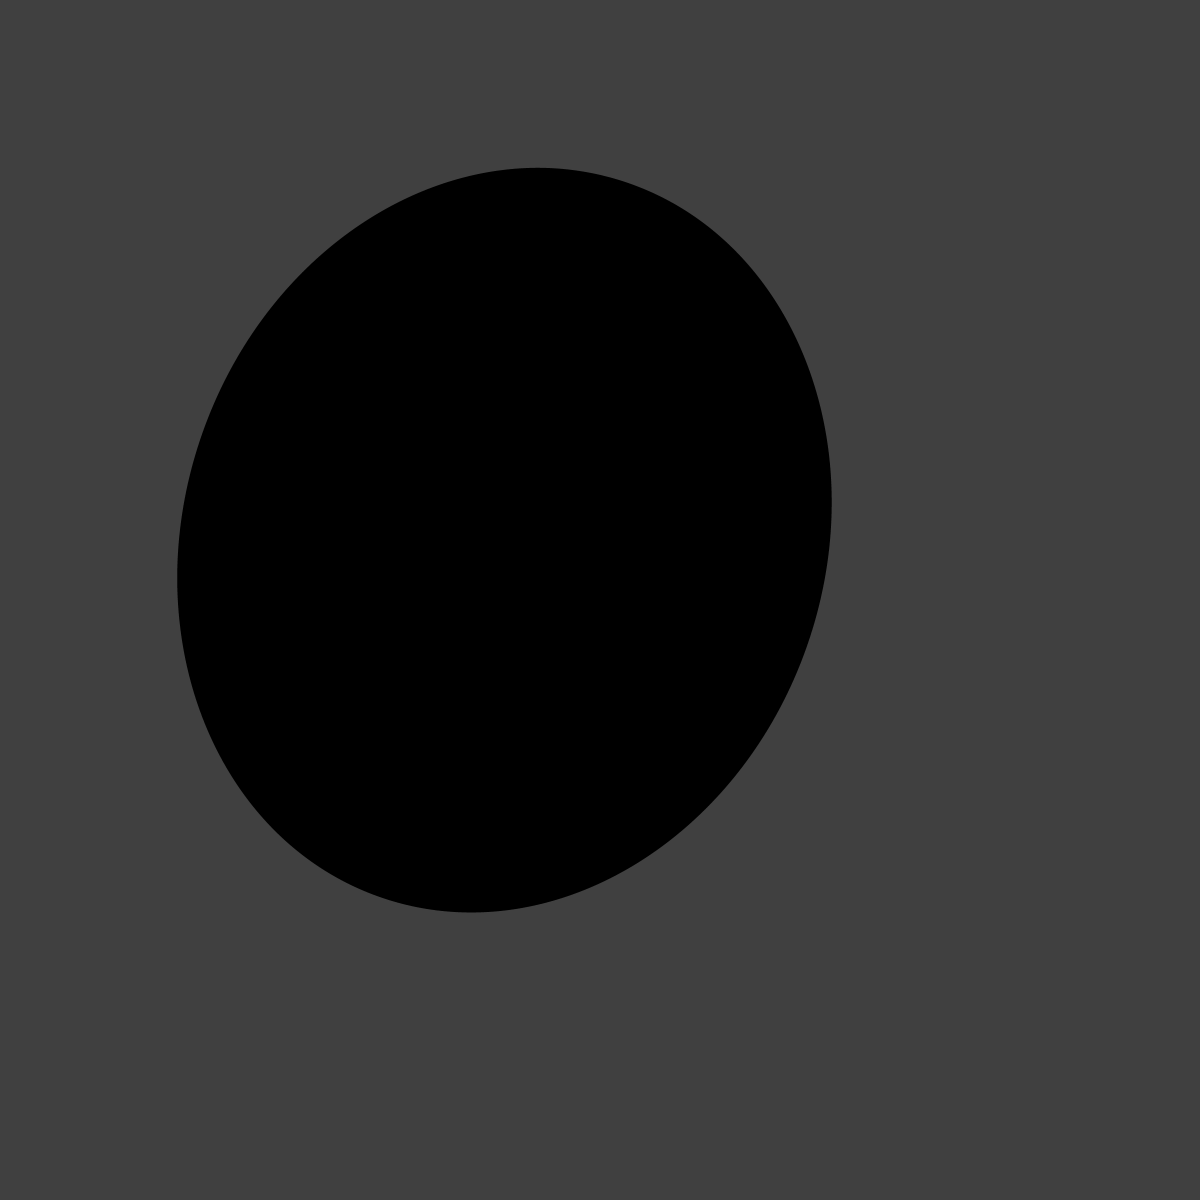

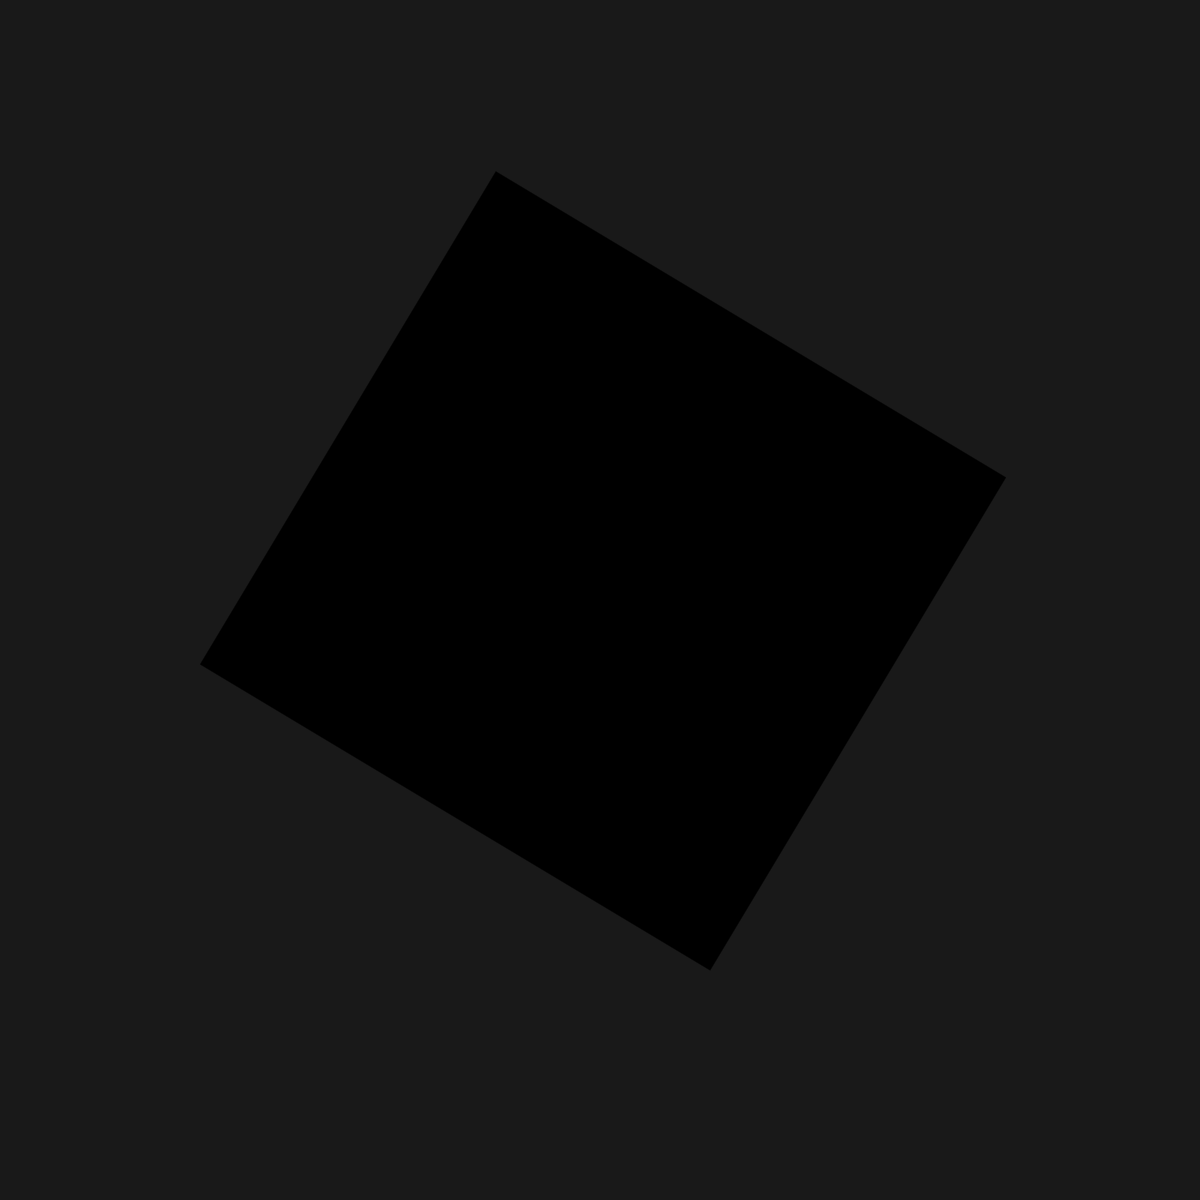

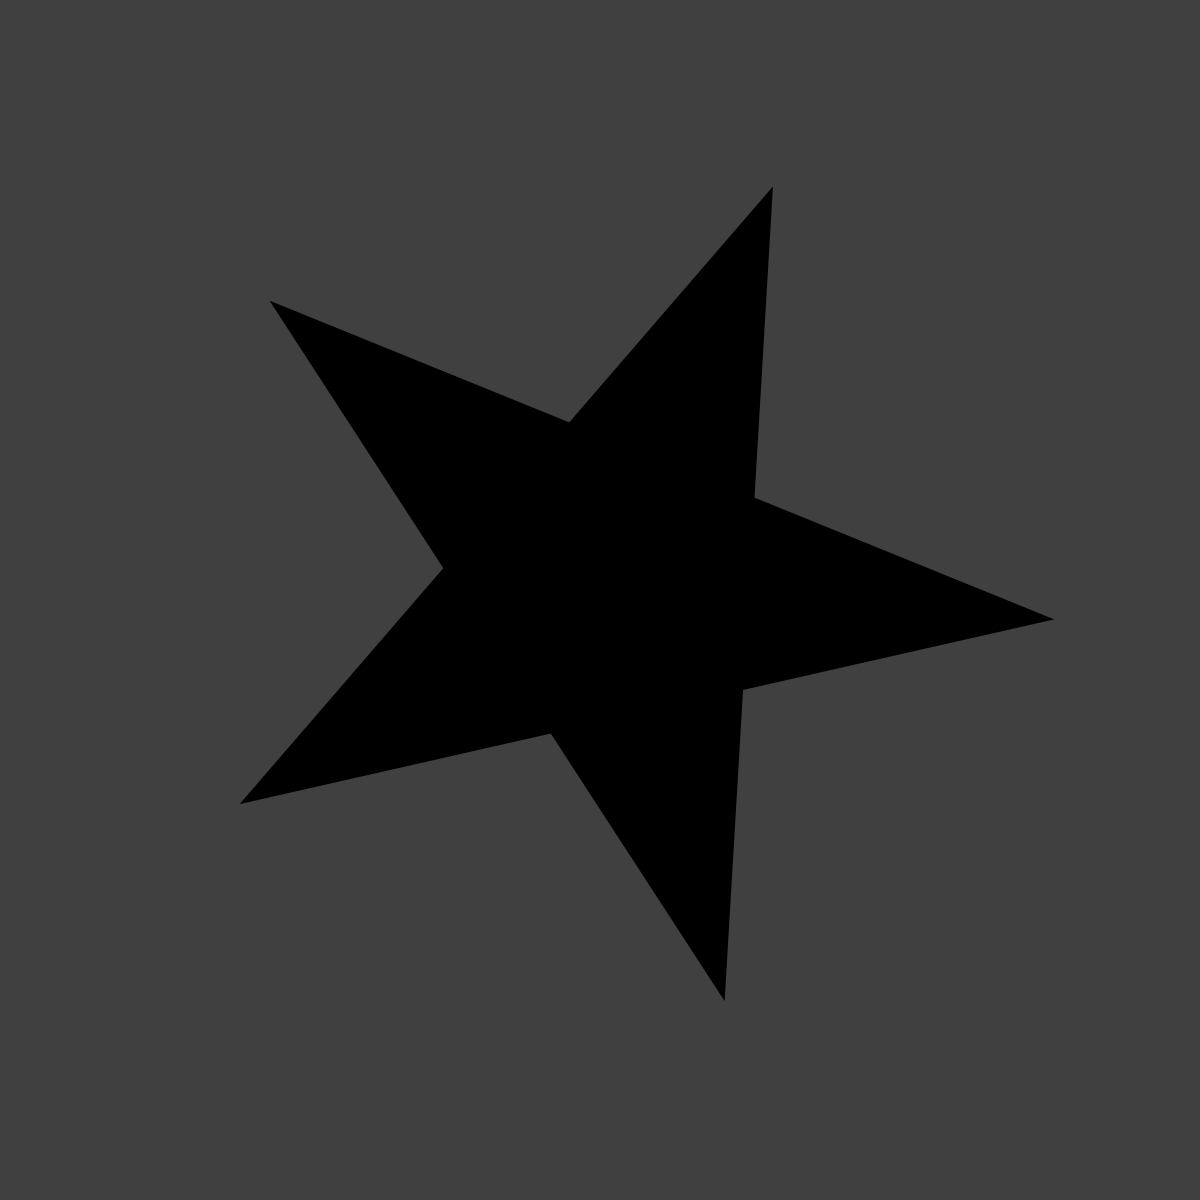

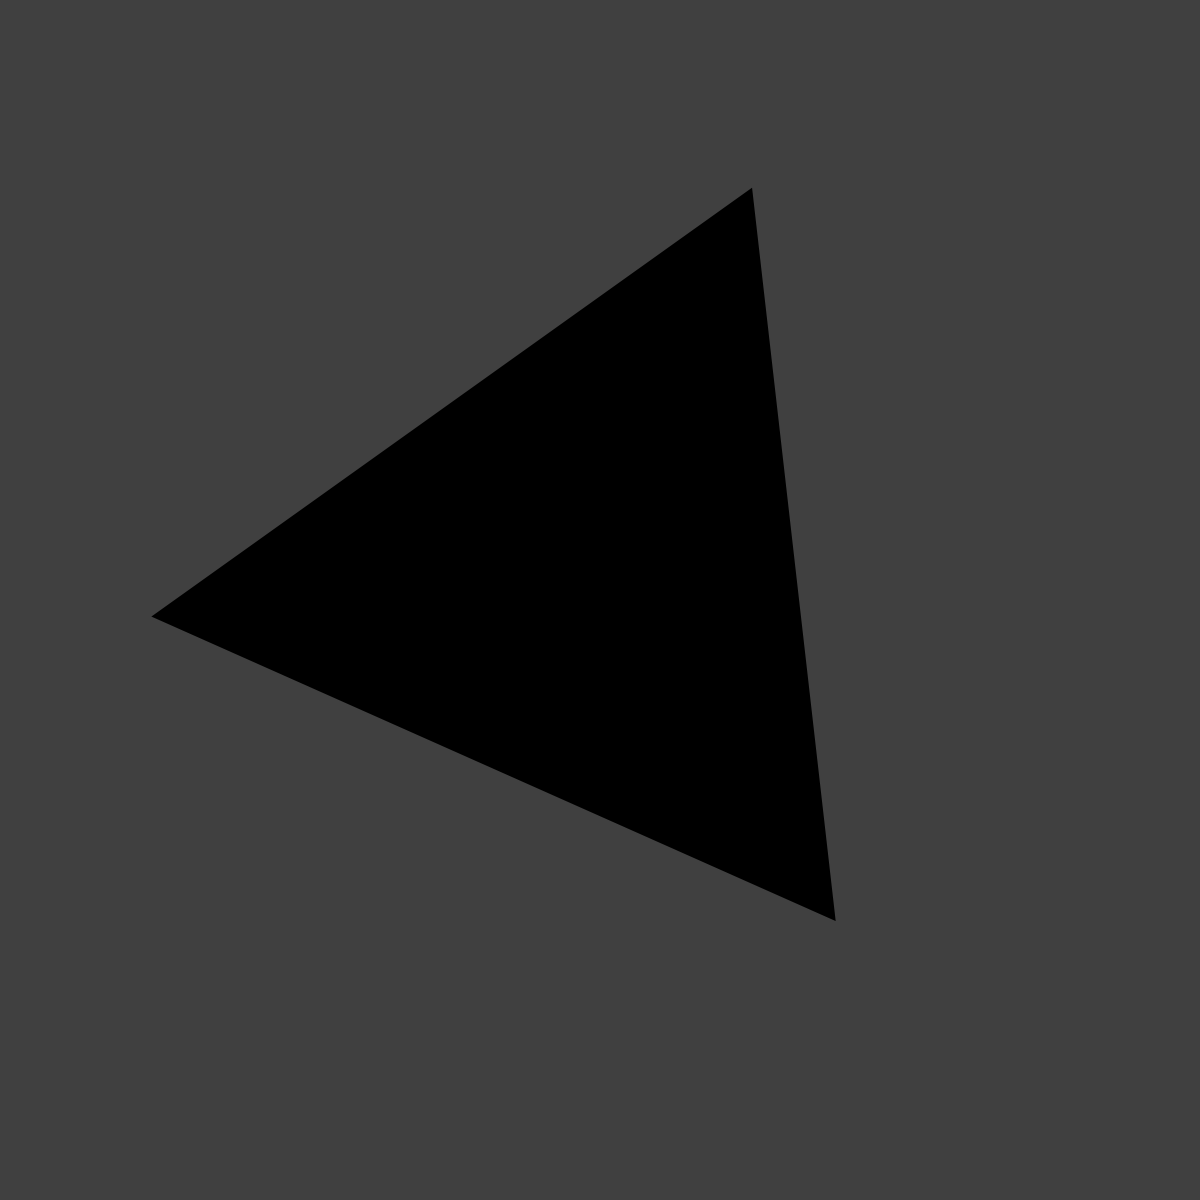

In [112]:
# newDataX = LS.getNewShapes()

imageList = glob.glob('NewTestData/*.png')
newDataX  = np.array([np.array(Image.open(fname)) for fname in imageList])


for i in range(newDataX.shape[0]):
    imNewDataX = Image.fromarray(newDataX[i])
    display(imNewDataX)

### Resizing new data

When loadin new data we need to resize the pictures to be of the same size as the ones that we trained with in our algorithm.

The shape of newDataX:  (4, 1200, 1200) 

newDataXr[ 0 ].shape : (200, 200)
newDataXr[ 1 ].shape : (200, 200)
newDataXr[ 2 ].shape : (200, 200)
newDataXr[ 3 ].shape : (200, 200)

Shape of newDataXr:  (4, 200, 200)


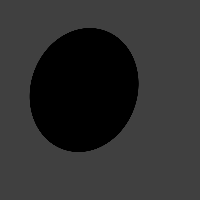

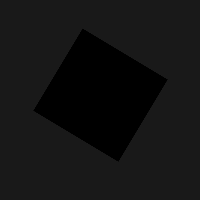

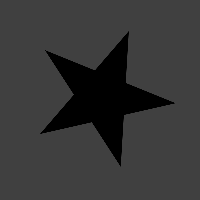

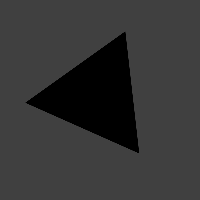


Shape of newDataXrr:  (4, 200, 200, 1)


In [113]:
import cv2
from PIL import Image
from resizeimage import resizeimage

newDataXr = []
newDataX_shape = newDataX.shape
print("The shape of newDataX: ", newDataX_shape, "\n")


# newDataXr = newDataX.reshape(4, 200, 200)
for i in range(newDataX.shape[0]):
    newDataXtest = cv2.resize(newDataX[i],(200,200))
    newDataXr.append(newDataXtest)
    print("newDataXr[",i,"].shape :", newDataXtest.shape)

newDataXr = np.array(newDataXr)    
    


# Printing the data:
print("\nShape of newDataXr: ", newDataXr.shape)
for i in range(newDataX.shape[0]):
    imNewDataX = Image.fromarray(newDataXr[i])
    display(imNewDataX)

# Resizing again to fit with grayscale:
newDataXrr = newDataXr.reshape(4, 200, 200,1)
print("\nShape of newDataXrr: ", newDataXrr.shape)

### Filtering the data to be 

In [115]:
# Predicting on test data:
X_new_predicted = model.predict(newDataXrr)
print(X_new_predicted)

[[0.0000000e+00 2.6537937e-03 0.0000000e+00 9.9734616e-01]
 [9.9962795e-01 3.7204704e-04 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 9.9999988e-01 1.0266475e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [130]:
def oneHotcleanup(data):
    for i in range(data.shape[0]):
        for n in range(data[i].shape[0]):

            if data[i, n] < 0.9:
                data[i, n] = 0
            else:
                data[i, n] = 1
            
    return data

def oneHotDecode(data):
    retData = []
    for i in range(data.shape[0]):
        decoded = label_encoder.inverse_transform([argmax(data[i,:])])
        retData.append(decoded)
        
    return retData

In [125]:
# TODO!!!!! use the function oneHotcleanup from LS

Xnew_cleaned= oneHotcleanup(X_new_predicted)

print(Xnew_cleaned)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [131]:
# TODO!!!!! use the function oneHotDecode from LS

Xnew_decode = oneHotDecode(Xnew_cleaned)
print(Xnew_decode)

[array(['Triangle'], dtype='<U8'), array(['Circle'], dtype='<U8'), array(['Star'], dtype='<U8'), array(['Triangle'], dtype='<U8')]


# TODO: Try to clean the pictures up a bit! 

## The dataset
TODO: hvilke data arbejder i med, hvilke features, hvor stammer det fra osv. (tag udgangspunkt i jeres aflevering "L03 Beskrivelse af eget slutprojekt" i O1).


## Preprossing
TODO: descripe what we think has been done to our data in the preprossing prosses.

### Running our own preprossing:

In [ ]:
#TODO: try ro run a known CNN on the data and see what happens.


## ML-Algorithms
TODO: beskriv f.eks.
* hvilken grundliggende ML algoritmeklasse(r) valgte i (supervised/unsupervised, regression/classifikation)?
* hvilke kriterier lå til grund for jeres model selection?
* hvorfor er jeres valgtealgoritme god til netop jeres dataset?
* hvad er fordele og ulemper ved den (eller de) valgte algoritme(r), f.eks. kompleksitet?

### Classifying the data

In [ ]:
# Todo run algorithms:
# Todo 

## ML pipeline:
TODO: Beskrivelse af hvordan i splitter data i train-test set, preprocessere, træner og tester.

## Performance metrics:
TODO: beskrivelse af, hvordan i måler 'effektiviteten' af jeres træning og test.

## Optimeringer og forbedringer:
TODO:  hvordan har i forbedret jeres system via optimeringsparametre (optimizers, regulizers) eller afsøgning af hyperparameterrummet? 

## Under- og overfitting: 
TODO: hvordan sørger i for, at jeres system ikke under- eller overfitter på jeres data?

## Diskussion (ikke et krav)
TODO: Diskuter hvad man ellers kunne gøre med dataen, mere data? præprossesering.

## Konklussion
TODO: Konklussionen på opgaven